<a href="https://colab.research.google.com/github/Ghislainniyongabo/Data_Science_group_project/blob/master/Mortgage_prediction_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group Assignment Data

Joseph Owuor Owino (josephowino@aims.ac.za)

Linda Agyapomah Agyare (lindaagyapomah@aims.ac.za)

Nedjla Tazdait (nedjla@aims.ac.za)

Roger Jeasy Bavibidila (roger@aims.ac.za)

Sitraka Nandrianina Tolojanahary (sitraka@aims.ac.za)

Ghislain Niyongabo (ghislainniyongabo@aims.ac.za)

### Mortgage Dataset:

We worked on the Mortagage Approval Dataset. The goal of this problem is to predict whether a mortagage application will be accepted or denied according to some factors depending on both the lender and the applicant. Some of these factors are loan amount, loan type, loan purpose, occupancy, amongst others. In all there are 21 feature variables and two outputs (i.e whether an application was accepted or denied) and hence this is a binary classifiaction Problem.

We obtained the dataset from Fedral Financial Instituitions Examination Council's(FFIEC). The Council is a formal interagency body empowered to prescribe uniform principles, standards, and report forms for the federal examination of financial institutions by the Board of Governors of the Federal Reserve System (FRB), the Federal Deposit Insurance Corporation (FDIC), the National Credit Union Administration (NCUA), the Office of the Comptroller of the Currency (OCC), and the Consumer Financial Protection Bureau (CFPB), and to make recommendations to promote uniformity in the supervision of financial institutions. 

The data being used in the problem is used to determine if is to predict whether a mortagage application will be accepted or denied. 

The dataset has two different tables including "Features" table and "Target or labels" table.


# Logistic Regreesion Model

Logistic regression is a linear model but with a nonlinear response. The response is binary, $\{ 0,1 \}$, or positive and negative. The response is the prediction of the category. Our target variable is composed by two unique classes reason why we are dealing with binary classification and logistic regression was chosen for this problem .

Properties of Logistic Regression:

$\bullet$ The dependent variable in logistic regression follows Bernoulli Distribution.

$\bullet$ Estimation is done through maximum likelihood.

$\bullet$ No R Square, Model fitness is calculated through Concordance, KS-Statistics.

In this notebook report we will discuss the following: 
-  Data preparation and preprocessing using scikit-learn.
-  The underpinning mathematics behind Logistic regression model (This was incorporated in this notebook and done at most of the important steps if the  model ).
-  Construction of a Logistic regression model using scikit-learn.
-  Evaluating the performance of the Logistic regression model. 
-  Using techniques such as reweighting the labels and changing the decision threshold to change the trade-off b      between false positive and false negative error rates. 

# Import libraries

In [0]:
#import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn
from keras.models import Sequential # # This indicate that whene adding addition layers, the sequence should go from the left to the right
from keras.layers import Dense # This enable the full connected layers
import numpy as np  # Import numpy libraries 
import matplotlib.pyplot as plt # For ploting the performance
from keras.utils import np_utils  # This a keras library which enables the one hot encoding
from sklearn.metrics import accuracy_score, confusion_matrix  # a sklearn functions that enables the computation of the accuracy and the plotting of the confusion matrix
from sklearn.model_selection import train_test_split  # This a function that enables to split the dataset into separate data such as training, validation and test data
from keras.utils import to_categorical # to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector
from sklearn.preprocessing import StandardScaler # This a function used in scaling the data
from sklearn.preprocessing import LabelEncoder #for encoding the levels of categorical features into numeric values
import pandas as pd # Python library for data analysis
from sklearn import preprocessing

from keras.models import model_from_json

%matplotlib inline

%tensorflow_version 1.x

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link1='https://drive.google.com/open?id=1JrPu5ulLN_wr_CoS7XiJxcz9-OMiJ20L'

In [0]:
fluff, id1 = link1.split('=')
print (id1) # Verify that you have everything after '='

1JrPu5ulLN_wr_CoS7XiJxcz9-OMiJ20L


In [0]:
link2='https://drive.google.com/open?id=1aqIWGFsf6PXXGxXxRLx_NyvSQg_AUzVs'

In [0]:
fluff, id2 = link2.split('=')
print (id2) # Verify that you have everything after '='

1aqIWGFsf6PXXGxXxRLx_NyvSQg_AUzVs


### We now  load and prepare the dataset.

In [0]:
downloaded1 = drive.CreateFile({'id':id1}) 
downloaded1.GetContentFile('Filename.csv')  
dataset1 = pd.read_csv('Filename.csv')

downloaded2 = drive.CreateFile({'id':id2}) 
downloaded2.GetContentFile('Filename.csv')  
dataset = pd.read_csv('Filename.csv')
#dataset1=pd.read_csv("mortgage-loan-approval/train_labels.csv") 

In [0]:
dataset1.shape  # excluding the id column

(500000, 2)

In [0]:
dataset.shape

(500000, 22)

## View the feature table

In [0]:
dataset.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False


# Viewing the labels

In [0]:
dataset1.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [0]:
dataset.columns

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant'],
      dtype='object')

In [0]:
dataset['property_type'].unique()

array([1, 2, 3])

### checking the number of missing values

In [0]:
dataset1.isnull().sum() 

row_id      0
accepted    0
dtype: int64

In [0]:
target=dataset1['accepted']

In [0]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: accepted, dtype: int64

## Merging the features and the target in one dataset 

In [0]:
dataset['accepted']=target

In [0]:
dataset.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [0]:
dataset.shape

(500000, 23)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
row_id                            500000 non-null int64
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 no

### Preprocessing the data:
We cleaned the data by removing missing data values.

In [0]:
dataset.isnull().sum() # here we show the missing data

row_id                                0
loan_type                             0
property_type                         0
loan_purpose                          0
occupancy                             0
loan_amount                           0
preapproval                           0
msa_md                                0
state_code                            0
county_code                           0
applicant_ethnicity                   0
applicant_race                        0
applicant_sex                         0
applicant_income                  39948
population                        22465
minority_population_pct           22466
ffiecmedian_family_income         22440
tract_to_msa_md_income_pct        22514
number_of_owner-occupied_units    22565
number_of_1_to_4_family_units     22530
lender                                0
co_applicant                          0
accepted                              0
dtype: int64

This dataset contains some missing values. However, the rate is not significant therefore we can perform the dropout in order to remove them from the dataset as they will not affect the performance adversely.

# The code below removes all the missing data.

In [0]:
dataset_cleaned=dataset.dropna()

In [0]:
dataset_cleaned.isnull().sum()

row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

###  Viewing the new shape of the dataset after cleaning 

In [0]:
dataset_cleaned.shape

(438255, 23)

In [0]:
dataset.accepted.value_counts()

1    250114
0    249886
Name: accepted, dtype: int64

#### Checking the Column Labels

In [0]:
for col in dataset_cleaned.columns: 
    print(col)     

row_id
loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_ethnicity
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
lender
co_applicant
accepted


### Transforming the categorical data to numerical data:

Precisely setting the co-applicant values which is  boolean to zeros and ones. In this case True values are set to 1 and the false values are set to 0. The efficient way to transform the categorical data into numerical data is to use the **One hot encoding** but for this case the data was almost encoded expect for the column **"co_applicant".** Therefore we will use a simple way using the **loc function** in order to replace where the values is False by o and where the values is True by 1.

In [0]:
dataset_cleaned.loc[(dataset_cleaned.co_applicant == True),'co_applicant']=1
dataset_cleaned.loc[(dataset_cleaned.co_applicant == False),'co_applicant']=0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
dataset_cleaned.head() # viewing the first five observaions 

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [0]:
dataset_cleaned['loan_purpose'].unique()

array([1, 3, 2])

In [0]:
dataset_cleaned['property_type'].unique()

array([1, 2])

### Droping Redundant Columns:
We removed the columns that are not needed. Such are the applicant identifier column (row id) and applicant ethnicity. We observed that these features don't have any effect on an applicant being accepted or not.

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['row_id']) 

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['applicant_ethnicity']) 

In [0]:
dataset_cleaned.head()

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,3,1,178.0,3,369,52,299,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,1,3,1,163.0,3,16,10,306,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,1,1,1,1,155.0,1,305,47,180,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,1,1,1,1,305.0,3,24,37,20,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [0]:
target_count = dataset_cleaned.accepted.value_counts()

In [0]:
dataset_cleaned['applicant_sex'].unique()

array([1, 2, 3, 4])

### Let us explore our target variable and visualize it for checking Whether the Classes are  Balanced or Imbalanced:


Class 0: 210208
Class 1: 228047
Proportion: 0.92 : 1
percentage of no accepted is 47.96476936943104
percentage of accepted 52.03523063056896


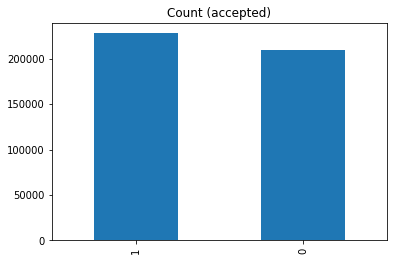

In [0]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

count_no_acc = len(dataset_cleaned[dataset_cleaned['accepted']==0])
count_acc = len(dataset_cleaned[dataset_cleaned['accepted']==1])
pct_of_no_acc = count_no_acc/(count_no_acc+count_acc)
print("percentage of no accepted is", pct_of_no_acc*100)
pct_of_acc = count_acc/(count_no_acc+count_acc)
print("percentage of accepted", pct_of_acc*100)

target_count.plot(kind='bar', title='Count (accepted)');


# Observations:

We observed that the classes are balanced since the proportion of the classes are 0.92 : 1. Moreover, Our classes are balanced, and the ratio of no-accepted to accepted instances is 47.96.


#### We can calculate categorical means for other categorical variables such as education and marital status to get a more detailed sense of our data.

### Plotting accepted against the race of the applicant.

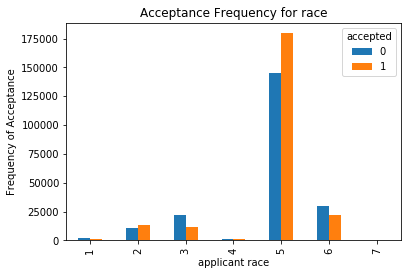

In [0]:
pd.crosstab(dataset_cleaned.applicant_race,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for race')
plt.xlabel('applicant race')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_applicant_race_bar')

The applicant race can be defined as following :
- 1 -- American Indian or Alaska Native
- 2 -- Asian
- 3 -- Black or African American
- 4 -- Native Hawaiian or Other Pacific Islander
- 5 -- White
- 6 -- Information not provided by applicant in mail, Internet, or telephone application
- 7 -- Not applicable
- 8 -- No co-applicant

From the graph we notice that the white people represente high frequency of acceptance. The American Indian or Alaska Native race have the lowest frequency close to 0.

### Plotting the frequence of accaptance against the sex of the applicant

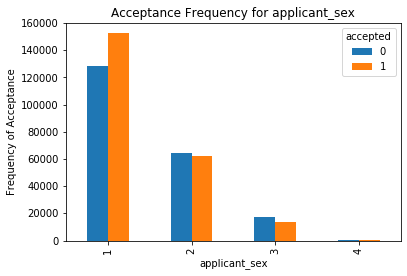

In [0]:
pd.crosstab(dataset_cleaned.applicant_sex,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for applicant_sex')
plt.xlabel('applicant_sex')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_applicant_sex_bar')

The feature sex are :
- 1 -- Male
- 2 -- Female
- 3 -- Information not provided by applicant in mail, Internet, or telephone application
- 4 -- Not applicable

The graph shows that the Acceptance frequency for male is higher compared to female almost the half.


In [0]:
#pd.crosstab(dataset_cleaned.lender,dataset_cleaned.accepted).plot(kind='bar')
#plt.title('Acceptance Frequency for lender')
#plt.xlabel('lender')
#plt.ylabel('Frequency of Accepted')
#plt.savefig('pur_fre_property_type_bar')

In [0]:
dataset_cleaned=dataset_cleaned.drop(columns =['lender']) 

### Plotting the frequence of accaptance against the property_type

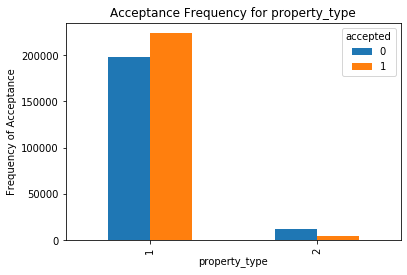

In [0]:
pd.crosstab(dataset_cleaned.property_type,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for property_type')
plt.xlabel('property_type')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_property_type_bar')

Acceptance Frequency for property_type:
- 1 -- One to four-family (other than manufactured housing)
- 2 -- Manufactured housing
- 3 -- Multifamily

From the graph we notice that we have just two property_type because we cleaned the data.

The Acceptance Frequency for the type "one to four family" is higher than the "Manufactured housing" which is close to 0.

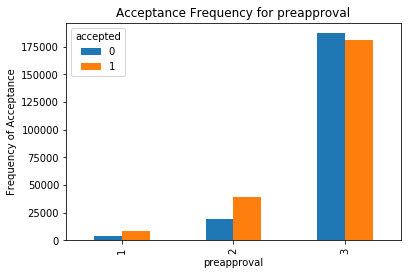

In [0]:
pd.crosstab(dataset_cleaned.preapproval,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for preapproval')
plt.xlabel('preapproval')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_preapproval_type_bar')

Preapproval:
- 1 -- Preapproval was requested
- 2 -- Preapproval was not requested
- 3 -- Not applicable

From the graph we notice that the Preapproval of the "not applicable" is higher than the "was not requested" characteristics and the "was requested" that is closed to zero.

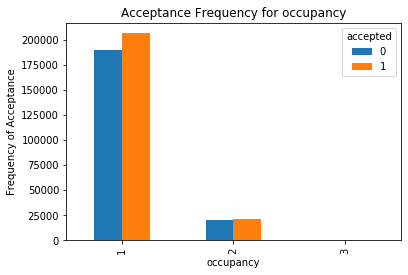

In [0]:
pd.crosstab(dataset_cleaned.occupancy,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for occupancy')
plt.xlabel('occupancy')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_occupancy_type_bar')

The feature of occupancy is characterized by :
- 1 -- Owner-occupied as a principal dwelling
- 2 -- Not owner-occupied
- 3 -- Not applicable

The first characteristic presents the highest frequency compared to the others characteristics. With that characteristic the accepted frequency is higher about 10000 than the denied.

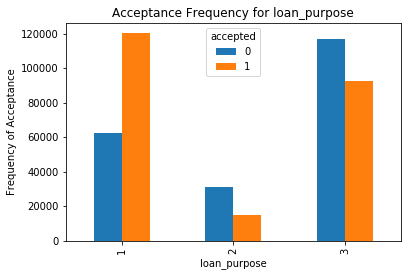

In [0]:
pd.crosstab(dataset_cleaned.loan_purpose,dataset_cleaned.accepted).plot(kind='bar')
plt.title('Acceptance Frequency for loan_purpose')
plt.xlabel('loan_purpose')
plt.ylabel('Frequency of Acceptance')
plt.savefig('pur_fre_loan_purpose_type_bar')

Loan-purposed:
- 1 -- Home purchase
- 2 -- Home improvement
- 3 -- Refinancingwith 

Here the "home purchase" and the "refinancing" characteristics presente almost the same frequency level, but with the "home purchase" the accepted are higher than the denied and inversly for the "refinancing".

In [0]:
for col in dataset_cleaned.columns: 
    print(col)     

loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
co_applicant
accepted


# Observation

Part of the feature selection process, the above process was done in order to plot and visualize the level of dependency of the target variable "accepted" according to the independent categorical variables. Apparently, some features do not have much impact on the decision of approving the mortgage such as "lender", and therefore those features have been removed in the orediction process.

In [0]:
for col in dataset_cleaned.columns: 
    print(col)     

loan_type
property_type
loan_purpose
occupancy
loan_amount
preapproval
msa_md
state_code
county_code
applicant_race
applicant_sex
applicant_income
population
minority_population_pct
ffiecmedian_family_income
tract_to_msa_md_income_pct
number_of_owner-occupied_units
number_of_1_to_4_family_units
co_applicant
accepted


In [0]:
#dataset_cleaned=dataset_cleaned.drop(columns =['lender']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['msa_md']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['population']) 
#dataset_cleaned=dataset_cleaned.drop(columns =['lender']) 

# Feature selection process

Feature selection can be done in multiple ways but there are broadly 3 categories of it:

1. Filter Method

2. Wrapper Method

3. Embedded Method




In [0]:
#corr = dataset_cleaned.corr()

In [0]:
#plt.figure(figsize=(15,10))
#sns.heatmap(corr)

###  Splitting the data into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [0]:
X= dataset_cleaned.drop(columns=['accepted']).values
Y = dataset_cleaned['accepted'].values

 

In [0]:
X.shape # Viewing the shape after spliting

(438255, 19)

In [0]:
Y.shape

(438255,)

## 1. Recursive Feature Elimination

We will use RFE with the Logistic Regression classifier to select the top features

In [0]:
dataset_cleaned_vars=dataset_cleaned.columns.values.tolist()
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, Y)
print("Feature selected: %s" %rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)
print("the number of features: %s" % rfe.n_features_)
#print("Num Features: %s" % (fit.n_features_))
#print("Selected Features: %s" % (fit.support_))
#print("Feature Ranking: %s" % (fit.ranking_))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature selected: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
the number of features: 19


Based on the test performed it is clear that most of the features have to participate in the prediction process. These are marked True in the support array and marked with a choice “1” in the ranking array. This, in turn, indicates the strength of these features. 

However, additional test can be done in order to select relavant features. 

## 2. Step Backwards Feature Selection


The performance metric used here to evaluate feature performance is pvalue. If the pvalue is above 0.05 then we remove the feature, else we keep it.

In [0]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.645866
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.067      
Dependent Variable: y                AIC:              566146.1826
Date:               2019-12-30 06:51 BIC:              566355.0032
No. Observations:   438255           Log-Likelihood:   -2.8305e+05
Df Model:           18               LL-Null:          -3.0341e+05
Df Residuals:       438236           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.0425     0.0048     -8.8008   0.0000   -0.0520   -0.0330
x2       -1.1935     0.0171    -69.6823   0.0

In [0]:
#!pip3 install mlxtend  

##### The p-values for most of the variables are smaller than 0.05, except one variable, therefore, we will remove it. This variable is "applicant_ethnicity"

#### After perfectly chosen the right features to use in this prediction, we proceeded in implementing the logistic model. However, 

#### we started by splitting the data into training and testing data in order to prepare and adapt the data to the system 

#### implementation.

###  Splitting the data into the training and testing data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)


we split $80\%$ of the data into training set while $20\%$ of the data to test set using below code.

In [0]:
X_train.shape

(350604, 19)

In [0]:
Y_train.shape

(350604,)

In [0]:
X_test.shape

(87651, 19)

In [0]:
Y_test.shape

(87651,)

## Scaling the data. this process was performed in order to normalize the data

In [0]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_train[:2,]

array([[ 1.02111381, -0.19475283,  0.99391477, -0.32702794, -0.23497574,
         0.41305369, -0.07134216, -0.17619695, -0.51941586,  0.23536504,
        -0.6907991 , -0.19073496, -0.18334384, -0.59748234, -1.13929136,
         0.57037416, -0.65348725, -0.45359604,  1.20285717],
       [-0.48793435, -0.19475283,  0.99391477, -0.32702794, -0.00541578,
         0.41305369,  0.8713285 , -0.24063737,  0.3615226 ,  0.23536504,
         0.91531327, -0.02235118,  0.31664688, -0.67951939,  0.16925827,
         0.57037416,  0.4140717 ,  0.13198255,  1.20285717]])

# Building our Logistic regression model

### Logistic Regression process


Given a $data(X,Y)$, X being a matrix of values with m examples (19 in our case of study after selecting the best features) and n features and Y being a vector with m examples (1 target variable "accepted" in this particular problem). The objective is to train the model to predict which class the future values belong to. 


1. Primarily, we create a weight matrix with random initialization. Then we multiply it by features.


$$F1 = W_o + W_1X_1+ W_2X_2 + W_3X_3+....+ W_nX_n$$

2. We then pass the output obtained from Eq 1. to a link function.

$$F(\hat{y}i) = \frac{1}{1 + e^{-\kappa( \beta_0 + \beta_1\ x1)}} $$


3. This is followed by calculating the cost for that iteration whose formula is

4. The derivative of this cost is calculated following which the weights are updated.

However the Logistic regression model for solving this problem will be implemented by  Scikit-learn  in the given code below. This code will compute all the mathematics described above.
 


In [0]:
#### Instantiate the Logistic Regression model using default and use fit() function to train your model.

In [0]:
from sklearn.linear_model import LogisticRegression

logistic_mod1 = linear_model.LogisticRegression() 
logistic_mod=logistic_mod1.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Now, print and examine the model coefficients by executing the code in the cell below. 

In [0]:
print(logistic_mod.intercept_)
print(logistic_mod.coef_)

[0.09200644]
[[-0.05357246 -0.26343024 -0.45730814 -0.00528296  0.07720718 -0.04905374
   0.00696385  0.05757348 -0.01067683  0.07579311 -0.07489059  0.05689833
   0.14003206 -0.15272534  0.10767421  0.11287501 -0.03011715 -0.10492251
   0.16472485]]


####  We notice that model coefficients look similar to that of a regression model. 

Recall that the logistic regression model outputs probabilities for each class. The class with the highest probability is taken as the score (prediction). Execute the code and the cell below to compute and display a sample of these class probabilities for the test feature set. 

What logistic regression does is that it calculates a conditional probability.

1. Probability for class 1

$$P(Y=1|X;W)$$

2. Probability for class 0

$$P(Y=0|X;W)$$


In [0]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.56187739 0.43812261]
 [0.65600283 0.34399717]
 [0.38232127 0.61767873]
 [0.43778626 0.56221374]
 [0.69897173 0.30102827]
 [0.55425922 0.44574078]
 [0.51452969 0.48547031]
 [0.6275191  0.3724809 ]
 [0.72451071 0.27548929]
 [0.38053806 0.61946194]
 [0.44989077 0.55010923]
 [0.30661456 0.69338544]
 [0.65270623 0.34729377]
 [0.59379619 0.40620381]
 [0.66250443 0.33749557]]


 #### Logistic regression model outputs probabilities for each class. We take the class with the highest probability as the score (prediction).

In this case study, we deal with two classes 1 and 0. Therefore, the threshold is 0.5.

if $P(Y=0) > 0.5$ then obviously $P(Y=0) > P(Y=1)$. The same stands for the multiclass setting: again, it chooses the class with the biggest probability.

In [0]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))
print(Y_test)

[0 0 1 ... 0 1 1]
[1 0 0 ... 1 0 1]


# Model Evaluation using Confusion Matrix

 **We use confusion matrix to evaluate the performance of our model by laying out the correctly and incorrectly classified cases in a tabular format** 

  There are various metrics derived from the values in the confusion matrix. We review some of the common cases below. 

**Confusion matrix**

For our binary case the confusion matrix is organized as follows:

| | **Scored Positive** | **Scored Negative**|  
|------|:------:|:------:| 
|**Actual Positive** | True Positive | False Negative |
|**Actual Negative**| False Positive | True Negative |   

Here the four elements in the matrix are defined as:    

$\bullet$ true positives (TP): These are cases in which we predicted yes and are actually yes.

$\bullet$true negatives (TN): We predicted no, and no in actual.

$\bullet$false positives (FP): We predicted yes, but actual is no. (Type I error)

$\bullet$false negatives (FN): We predicted no, yes in actual. (Type II error)

**Accuracy**

Accuracy is the fraction of cases correctly classified. For this case accuracy is written as

$$Accuracy = \frac{TP+TN}{TP+FP+TN+FN}$$ 

**Precision**

Precision is the fraction of correctly classified label cases out of all cases classified with that label value. We can express precision by the following relationship:

$$Precision = \frac{M_{i,i}}{\sum_j M_{i,j}}$$

We can say that the precision statistic is the number of correctly classified cases for the label value divided by all the cases in the column. Thus, precision is sensitive to the number of cases correctly classified for a given score value. 

**Recall**  

Recall is the fraction of cases of a label value correctly classified out of all cases that actually have that label value. We can express recall by the following relationship:

$$Recall = \frac{M_{i,i}}{\sum_i M_{i,j}}$$

We can say that the recall statistic is the number of correctly classified cases for the label value divided by all the cases in the row. Thus, precision is sensitive to the number of cases correctly classified for a given true label value. 

**F1**

The F1 statistic is weighted average of precision and recall. We can express F1 by the following relationship:

$$F1 = 2 * \frac{precision * recall}{precision + recall}$$

Said differenlty, F1 is a weighted metric for overall model performance. 

**ROC** and **AUC**

the ROC curve compares the model true positive and false positive rates to the ones from a random assignation. If the model roc is above the baseline, then the model is better than random assignation.

The code in the cell below implements a function that computes and displays the forementioned classifier performance metrics. The code metrics are computed using the precision_recall_fscore_support and accuracy_score functions from the metrics package of scikit-learn. The confusion matrix is computed using the confusion_matrix function from this same package. We execute this code and examine the results for the logistic regression model. 

In [0]:
y_pred=logistic_mod.predict(X_test)

In [0]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
cnf_matrix

array([[25432, 16876],
       [15245, 30098]])

# Visualizing Confusion Matrix using Heatmap

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

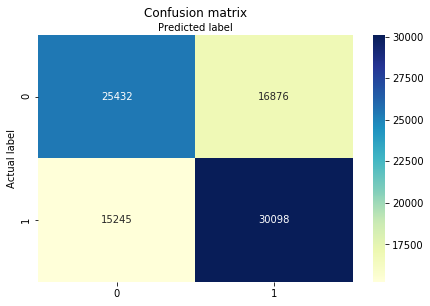

In [0]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Results discussion

$\bullet$ true positives (TP): 25431 have beeen predicted at true positives.

$\bullet$true negatives (TN): 16877 have beeen predicted at true negatives.

$\bullet$false positives (FP):  15244 have beeen predicted at false positives.

$\bullet$false negatives (FN): 30099 have beeen predicted at false negatives.


In [0]:
print("Accuracy of the model:",metrics.accuracy_score(Y_test, y_pred))
print("Precision of the model:",metrics.precision_score(Y_test, y_pred))
print("Recall:",metrics.recall_score(Y_test, y_pred))

Accuracy of the model: 0.6335352705616593
Precision of the model: 0.6407374292161622
Recall: 0.6637849282138367


## ROC and Precision-Recall curves

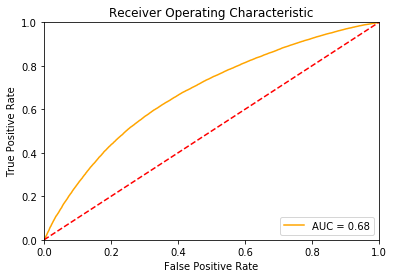

In [0]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(Y_test, probabilities)    

## Computing a weighted model

The accuracy computed is too small for this prediction and by making an analysis on the confusion model, we observe that so many errors occur during the training process. One approach to these problems is to weight the classes when computing the logistic regression model. The code in the cell below adds a `class_weight` argument to the call to the `LogisticRegression` function. In this case weights are chosen as $0.99, 0.99$  but you can also give another combination. 

In [0]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.99, 1:0.99}) 
logistic_mod.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight={0: 0.99, 1: 0.99}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Next,  we execute the code in the cell below to compute and display the class probabilities for each case. 

In [0]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.5618774  0.4381226 ]
 [0.65600283 0.34399717]
 [0.38232128 0.61767872]
 [0.43778628 0.56221372]
 [0.6989717  0.3010283 ]
 [0.55425922 0.44574078]
 [0.51452968 0.48547032]
 [0.62751909 0.37248091]
 [0.72451069 0.27548931]
 [0.38053806 0.61946194]
 [0.44989075 0.55010925]
 [0.30661461 0.69338539]
 [0.6527062  0.3472938 ]
 [0.59379617 0.40620383]
 [0.6625044  0.3374956 ]]


## AUC curves

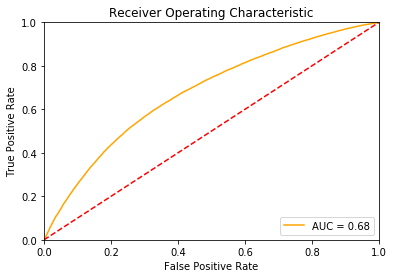

In [0]:
scores = score_model(probabilities, 0.5)
#print_metrics(Y_test, scores)  
plot_auc(Y_test, probabilities)  

#### After changing the weights of the two classes we almost obatined the same accuracy 

# Deep Learning Model

Looking at the low performance provided by the classical method in solving this problem

## Designing the deep learning model

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.30, random_state=1)

In [0]:
classes = np.unique(Y_test)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  [0 1]


In [0]:
Y_train = np_utils.to_categorical(Y_train, 2)
Y_test = np_utils.to_categorical(Y_test, 2)
Y_val = np_utils.to_categorical(Y_val, 2)

In [0]:
Y_train.shape

(245422, 2)

In [0]:
Y_test.shape

(87651, 2)

In [0]:
Y_val.shape

(105182, 2)

In [0]:
def network():
  
    
    model = Sequential() # Initializing the sequence

    model.add(Dense(30, input_dim=20, activation='relu'))
    #model.add(Dense(11, activation='relu'))
    model.add(Dense(10, activation='tanh'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

## Initialise the model

In [0]:
model=network()

## Determine the number of trainable parameters

In [0]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 30)                630       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 22        
Total params: 962
Trainable params: 962
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [0]:
history = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), 
                    epochs=10, 
                    batch_size=8, 
                    verbose=1)

Train on 245422 samples, validate on 105182 samples
Epoch 1/10
245422/245422 [==============================] - 34s 137us/step - loss: 0.6940 - accuracy: 0.5146 - val_loss: 0.6924 - val_accuracy: 0.5202
Epoch 2/10
245422/245422 [==============================] - 34s 137us/step - loss: 0.6932 - accuracy: 0.5151 - val_loss: 0.6956 - val_accuracy: 0.4797
Epoch 3/10
245422/245422 [==============================] - 33s 134us/step - loss: 0.6931 - accuracy: 0.5142 - val_loss: 0.6923 - val_accuracy: 0.5202
Epoch 4/10
245422/245422 [==============================] - 41s 169us/step - loss: 0.6932 - accuracy: 0.5147 - val_loss: 0.6925 - val_accuracy: 0.5202
Epoch 5/10
245422/245422 [==============================] - 51s 208us/step - loss: 0.6933 - accuracy: 0.5147 - val_loss: 0.6927 - val_accuracy: 0.5202
Epoch 6/10
245422/245422 [==============================] - 56s 230us/step - loss: 0.6931 - accuracy: 0.5147 - val_loss: 0.6933 - val_accuracy: 0.4797
Epoch 7/10
245422/245422 [================

## Predict classes on validation data

In [0]:
prediction_classes = model.predict_classes(X_val)

## Computing the confusion matrix for the validation data

In [0]:
confusion_matrix(np.argmax(Y_val,1), prediction_classes)

array([[    0, 50462],
       [    0, 54720]])

### Computing the accuracy and this simply test the trained model on the validation data and printout the accuracy for the model to predict 

In [0]:
accuracy_score(np.argmax(Y_val,1), prediction_classes)

0.5202411058926433

## Plot the training Accuracy

In [0]:
def plot_hist(h, xsize=6, ysize=10):

    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True)
    
    # summarize history for Accuracy
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training Performance')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='best')
    
    plt.draw()
    plt.show()

    return

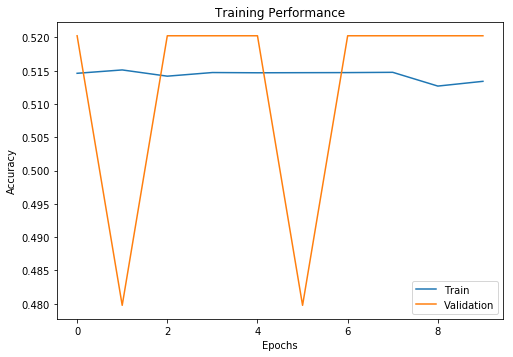

In [0]:
plot_hist(history.history, xsize=8, ysize=12)

## Model Evaluation

The evaluation of the model is done on the data that the model has not yet seen before in order to verify that the choice made
after the validation process is right to be trusted in the prediction

In [0]:
prediction_classes_test = model.predict_classes(X_test)

In [0]:
confusion_matrix(np.argmax(Y_test,1), prediction_classes_test)

array([[    0, 42308],
       [    0, 45343]])

In [0]:
accuracy_score(np.argmax(Y_test,1), prediction_classes_test)

0.5173129798861393